In [1]:
"""
Authors: Phillip Kearns, John Lipor
KRR demo - syntheticTest
python version: 3.7.2
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from KRR import KRR

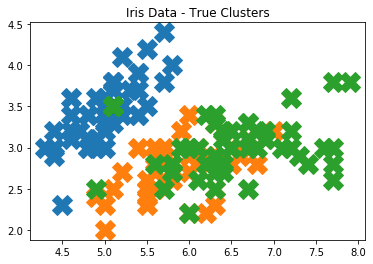

In [12]:
get_Iris = datasets.load_iris()
X = get_Iris.data
N, D = X.shape
trueLabels = get_Iris.target.reshape(N, 1)
K = len(np.unique(trueLabels))

seto_ind = np.argwhere(trueLabels==0) # setosa
vers_ind = np.argwhere(trueLabels==1) # versicolor
virg_ind = np.argwhere(trueLabels==2) # virginica

plt.plot(X[seto_ind,0], X[seto_ind,1], 'C0X',markerSize=20)
plt.plot(X[vers_ind,0], X[vers_ind,1], 'C1X',markerSize=20)
plt.plot(X[virg_ind,0], X[virg_ind,1], 'C2X',markerSize=20)
plt.title("Iris Data - True Clusters");

Accuracy (sigma = 0.1) : 0.37
Accuracy (sigma = 0.5) : 0.87
Accuracy (sigma = 1.0) : 0.92


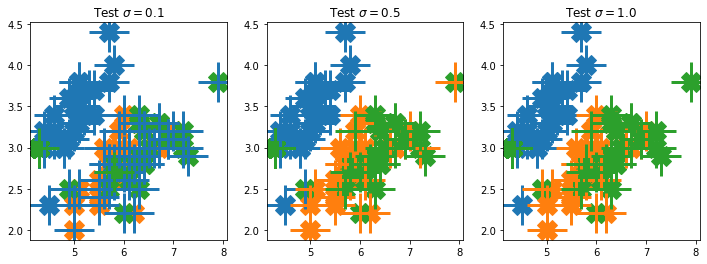

In [47]:
# See how varying the sigma parameter impacts test accuracy
lam    = 0.1
sigmas = [0.1, 0.5, 1.0]
X_train, X_test, y_train, y_test = train_test_split(X, trueLabels, test_size=0.5)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
for ii, sigma in enumerate(sigmas):

    ytrain, ytest = KRR(X_train, y_train, lam, sigma, Xtest=X_test)
    ytrain = np.abs(np.round(ytrain))
    ytest  = np.abs(np.round(ytest))

    # plot the testing performance
    true_seto_ind = np.argwhere(y_test==0) # setosa
    true_vers_ind = np.argwhere(y_test==1) # versicolor
    true_virg_ind = np.argwhere(y_test==2) # virginica

    est_seto_ind = np.argwhere(ytest==0) # setosa
    est_vers_ind = np.argwhere(ytest==1) # versicolor
    est_virg_ind = np.argwhere(ytest==2) # virginica

    axes[ii].plot(X_test[true_seto_ind,0], X_test[true_seto_ind,1],'C0X',markersize=20)
    axes[ii].plot(X_test[true_vers_ind,0], X_test[true_vers_ind,1],'C1X',markersize=20)
    axes[ii].plot(X_test[true_virg_ind,0], X_test[true_virg_ind,1],'C2X',markersize=20)

    axes[ii].plot(X_test[est_seto_ind,0], X_test[est_seto_ind,1],'C0+',markersize=40,mew=3)
    axes[ii].plot(X_test[est_vers_ind,0], X_test[est_vers_ind,1],'C1+',markersize=40,mew=3)
    axes[ii].plot(X_test[est_virg_ind,0], X_test[est_virg_ind,1],'C2+',markersize=40,mew=3)

    axes[ii].set_title(r'Test $\sigma = %.1f$'%sigma)
    print(r'Accuracy (sigma = %.1f) : %.2f'%(sigma,accuracy_score(y_test,ytest.T)))

Accuracy (lam = 0.0) : 0.91
Accuracy (lam = 0.1) : 0.88
Accuracy (lam = 1.0) : 0.79


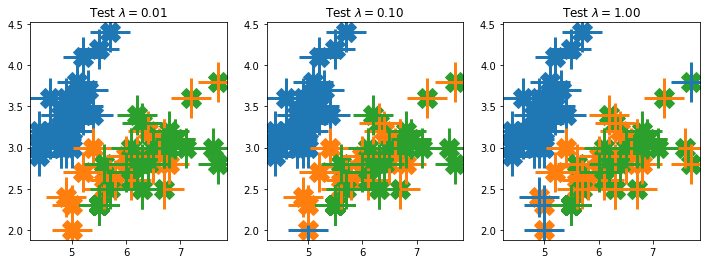

In [50]:
# See how varying the lambda parameter impacts test accuracy
lambdas = [0.01, 0.1, 1.0]
sigma   = 0.5   

X_train, X_test, y_train, y_test = train_test_split(X, trueLabels, test_size=0.5)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
for ii, lam in enumerate(lambdas):

    ytrain, ytest = KRR(X_train, y_train, lam, sigma, Xtest=X_test)
    ytrain = np.abs(np.round(ytrain))
    ytest  = np.abs(np.round(ytest))

    # plot the testing performance
    true_seto_ind = np.argwhere(y_test==0) # setosa
    true_vers_ind = np.argwhere(y_test==1) # versicolor
    true_virg_ind = np.argwhere(y_test==2) # virginica

    est_seto_ind = np.argwhere(ytest==0) # setosa
    est_vers_ind = np.argwhere(ytest==1) # versicolor
    est_virg_ind = np.argwhere(ytest==2) # virginica

    axes[ii].plot(X_test[true_seto_ind,0], X_test[true_seto_ind,1],'C0X',markersize=20)
    axes[ii].plot(X_test[true_vers_ind,0], X_test[true_vers_ind,1],'C1X',markersize=20)
    axes[ii].plot(X_test[true_virg_ind,0], X_test[true_virg_ind,1],'C2X',markersize=20)

    axes[ii].plot(X_test[est_seto_ind,0], X_test[est_seto_ind,1],'C0+',markersize=40,mew=3)
    axes[ii].plot(X_test[est_vers_ind,0], X_test[est_vers_ind,1],'C1+',markersize=40,mew=3)
    axes[ii].plot(X_test[est_virg_ind,0], X_test[est_virg_ind,1],'C2+',markersize=40,mew=3)

    axes[ii].set_title(r'Test $\lambda = %.2f$'%lam)
    print(r'Accuracy (lam = %.1f) : %.2f'%(lam,accuracy_score(y_test,ytest.T)))

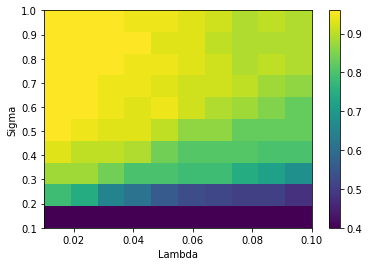

In [51]:
# Vary the parameters and see how performance is impacted 
sigmas = np.linspace(0.1, 2.0, 10)
lams   = np.linspace(0.1, 2.0, 10)
accuracy = np.zeros((10,10))
for ii, sigma in enumerate(sigmas):
    for jj, lam in enumerate(lams):
        ytrain, ytest = KRR(X_train, y_train, lam, sigma, Xtest=X_test)
        ytrain = np.abs(np.round(ytrain))
        ytest  = np.abs(np.round(ytest))
        accuracy[ii,jj] = accuracy_score(y_test,ytest.T)


plt.imshow(accuracy,origin='lower',aspect='auto',extent=[0.01,0.1,0.1,1.0])
plt.colorbar()
plt.xlabel('Lambda')
plt.ylabel('Sigma');